# Employee Satisfaction Analysis Project
## Introduction
This project aims to analyze employee satisfaction levels based on various factors such as the number of projects, average monthly hours, and more. The goal is to identify key drivers of satisfaction and provide actionable insights for improving employee engagement and retention.

## Dataset
The dataset includes information on employee satisfaction levels, evaluation scores, number of projects, average monthly hours, tenure, and more. The satisfaction score is self-reported by employees. The dataset consists of 15,000 records.

## Objectives
- Perform data cleaning and preprocessing.
- Conduct exploratory data analysis (EDA).
- Visualize relationships between different features and satisfaction levels.
- Identify key insights and recommendations to improve employee satisfaction.

In [2]:
# Importing necessary libraries and packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Initial Exploration

The dataset is loaded and explored to understand its structure and contents.

### Summary
- The dataset contains 15,000 records with 10 features.
- There are 788 missing records, which will be handled in the data cleaning section.
- Key features include `satisfaction_level`, `last_evaluation`, `number_project`, `average_monthly_hours`, `time_spend_company`, `Work_accident`, `promotion_last_5years`, `dept`, and `salary`.

In [3]:
# Importing Data as pandas DataFrame and displaying information about the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

print('First few rows of data')
print(data.head())

print('\nDataset Info')
print(data.info())

print('\nNumber of Null Records')
print(data.isnull().sum())

First few rows of data
   Emp ID  satisfaction_level  last_evaluation  number_project  \
0     1.0                0.38             0.53             2.0   
1     2.0                0.80             0.86             5.0   
2     3.0                0.11             0.88             7.0   
3     4.0                0.72             0.87             5.0   
4     5.0                0.37             0.52             2.0   

   average_montly_hours  time_spend_company  Work_accident  \
0                 157.0                 3.0            0.0   
1                 262.0                 6.0            0.0   
2                 272.0                 4.0            0.0   
3                 223.0                 5.0            0.0   
4                 159.0                 3.0            0.0   

   promotion_last_5years   dept  salary  
0                    0.0  sales     low  
1                    0.0  sales  medium  
2                    0.0  sales  medium  
3                    0.0  sales     low

## Data Cleaning and Preprocessing

In this section, we handle missing values, correct column names, and encode categorical variables to prepare the data for analysis.

### Steps
1. **Drop Missing Values:** We drop records with missing data to ensure the quality of our analysis.
2. **Correct Column Names:** The column `average_montly_hours` is corrected to `average_monthly_hours`.
3. **Encode Categorical Variables:** The `salary` column is encoded to numerical values for easier analysis.
4. **Evaluate Department Feature:** We check if the `dept` feature is worth keeping by analyzing the average satisfaction rates across departments. If similar, we will drop it.

In [4]:
# Drop records with no data

data = pd.read_csv(file_path)
data = data.dropna()

# Fix misspelled column
data = data.rename(columns={'average_montly_hours':'average_monthly_hours'})

# Encode categorical Salary column
sal_mapping = {'low': 1, 'medium':2, 'high':3}

if 'salary' in data.columns:
    data['sal_encoded'] = data['salary'].map(sal_mapping)

# Determine if Department feature is worth keeping (if average satisfaction rates are similar across departments we will drop 'dept')
sat_by_dept = data.groupby('dept')['satisfaction_level'].mean()
#print(sat_by_dept)

# Drop Salary and Department features and display the top few records of the cleaned dataset
if 'salary' in data.columns:
    data = data.drop(columns = ['salary'])

if 'dept' in data.columns:
    data = data.drop(columns = ['dept'])

data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,sal_encoded
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,2
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,2
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,1
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,1


## Exploratory Data Analysis (EDA)

In this section, we explore the dataset to uncover initial insights and patterns.

   sal_encoded  satisfaction_level
0            1            0.600753
1            2            0.621817
2            3            0.637470


<function matplotlib.pyplot.show(close=None, block=None)>

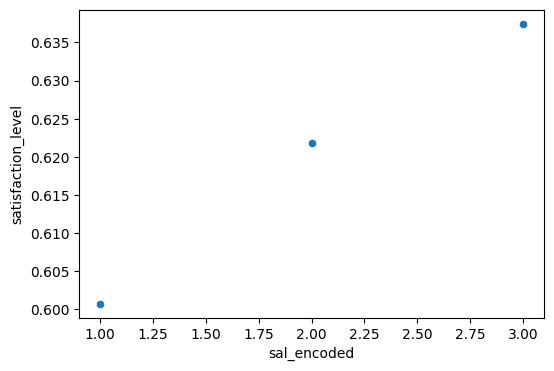

In [5]:
# Dispaly average satisfaction by Salary level

sat_by_sal = data.groupby('sal_encoded')['satisfaction_level'].mean().reset_index()
print(sat_by_sal)

plt.figure(figsize=(6,4))
sns.scatterplot(x='sal_encoded', y='satisfaction_level', data=sat_by_sal)
plt.show

### Correlation Matrix
We create a correlation matrix to understand the relationships between different features and satisfaction levels.

satisfaction_level       1.000000
last_evaluation          0.105021
Work_accident            0.058697
sal_encoded              0.050022
promotion_last_5years    0.025605
average_monthly_hours   -0.020048
time_spend_company      -0.100866
number_project          -0.142970
Name: satisfaction_level, dtype: float64


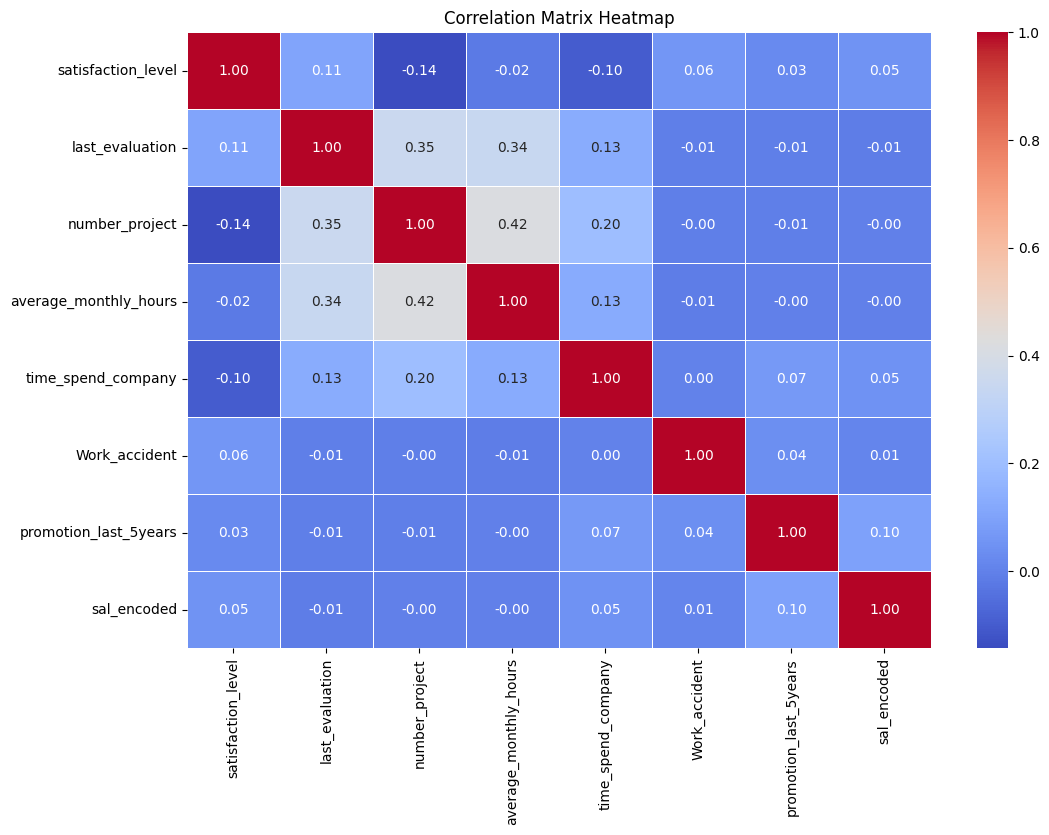

In [6]:
# Create and display correlation matrix

features = data.drop(columns='Emp ID')

correlation_matrix = features.corr()

# Show descending list of correlations coefficients
print(correlation_matrix['satisfaction_level'].sort_values(ascending=False))

plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Scatterplot of Satisfaction Levels
We visualize the distribution of satisfaction levels against average monthly hours.

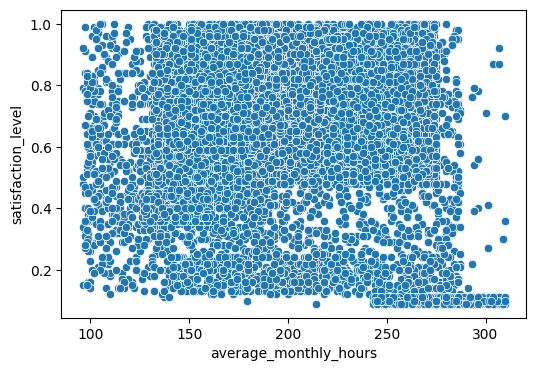

In [7]:
# Create scatterplot of satisfaction levels to see distribution
plt.figure(figsize=(6,4))
sns.scatterplot(x='average_monthly_hours', y='satisfaction_level', data=data)
plt.show()

### Relationship Between Monthly Hours and Satisfaction Rate
We analyze the relationship between average monthly hours and satisfaction rate


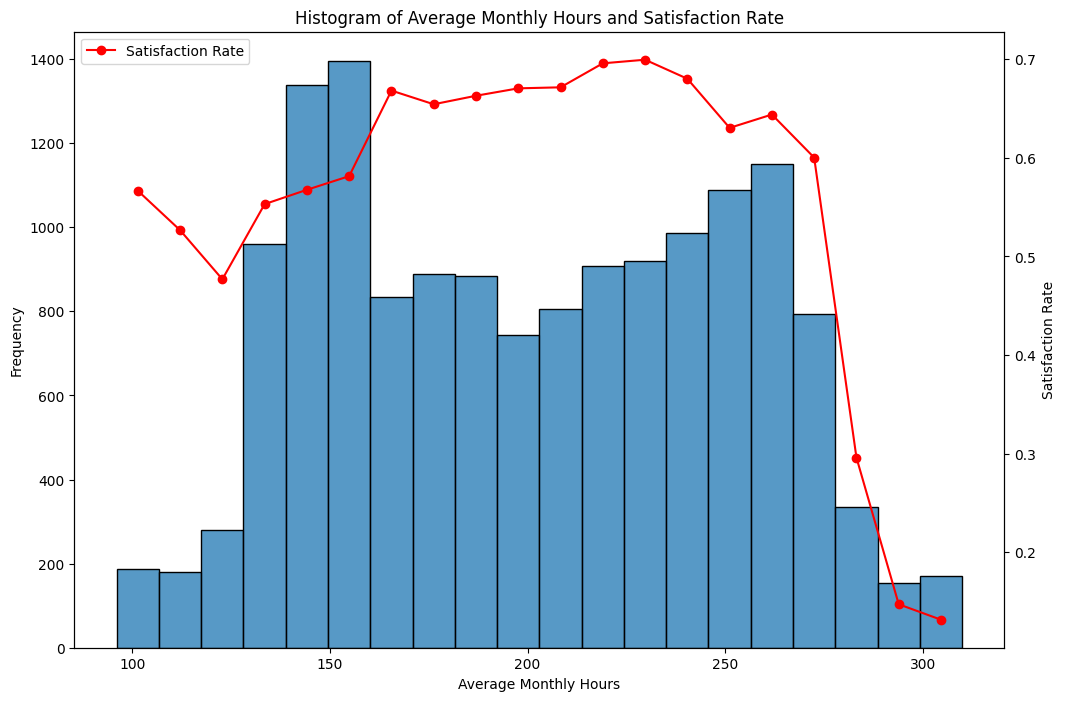

In [8]:
# Create graph showing relationship between monthly hours and satisfaction rate

# Calculate mean satisfaction rate for each bin of average monthly hours
bin_edges = np.histogram_bin_edges(data['average_monthly_hours'], bins=20)
data['hours_bin'] = pd.cut(data['average_monthly_hours'], bins=bin_edges)
satisfaction_by_hours_bin = data.groupby('hours_bin')['satisfaction_level'].mean()

# Plot the histogram for average monthly hours
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.histplot(data=data, x='average_monthly_hours', bins=20, kde=False, ax=ax1)
ax1.set_xlabel('Average Monthly Hours')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Average Monthly Hours and Satisfaction Rate')

# Create a secondary y-axis for the satisfaction rate
ax2 = ax1.twinx()
ax2.plot(bin_edges[:-1] + np.diff(bin_edges) / 2, satisfaction_by_hours_bin, color='r', marker='o', linestyle='-', label='Satisfaction Rate')
ax2.set_ylabel('Satisfaction Rate')
ax2.legend(loc='upper left')

# Show the plot
plt.show()

Displaying plot for number_project
Displaying plot for time_spend_company
Displaying plot for Work_accident
Displaying plot for promotion_last_5years
Displaying plot for sal_encoded


C:\Users\alvar\AppData\Local\Temp\ipykernel_13300\2372221343.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


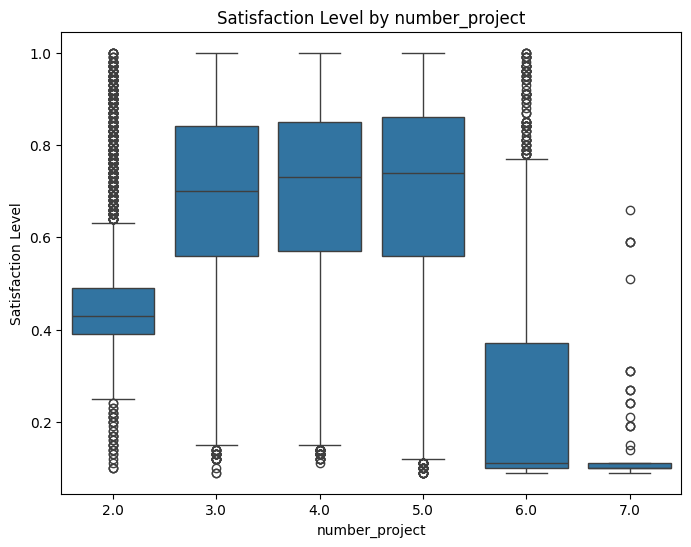

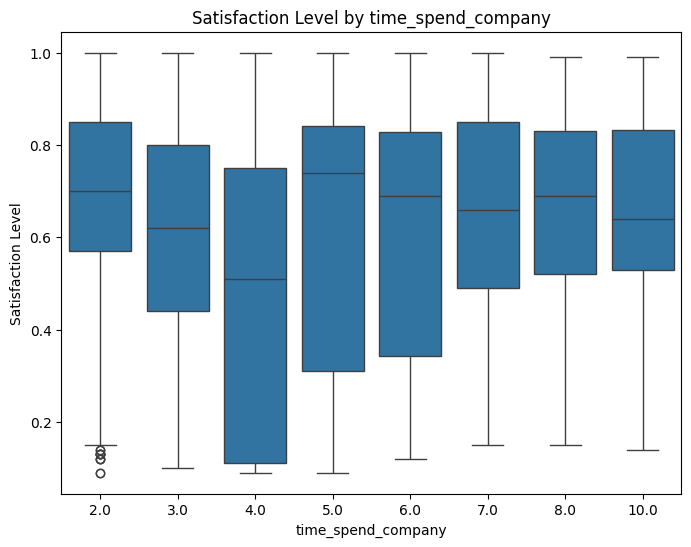

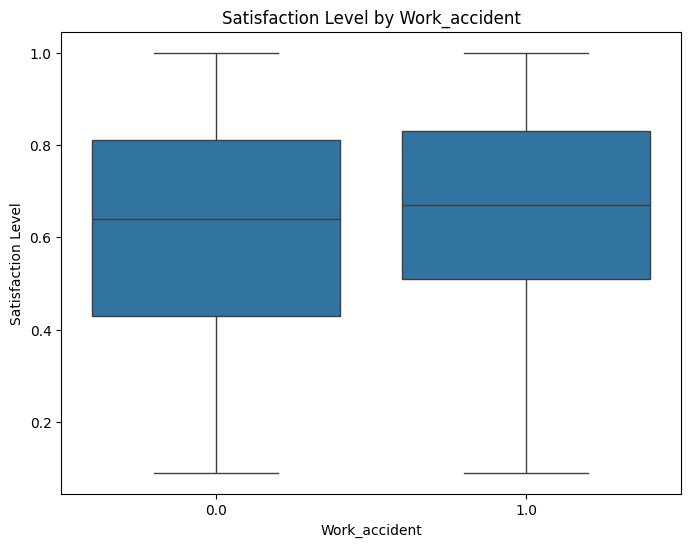

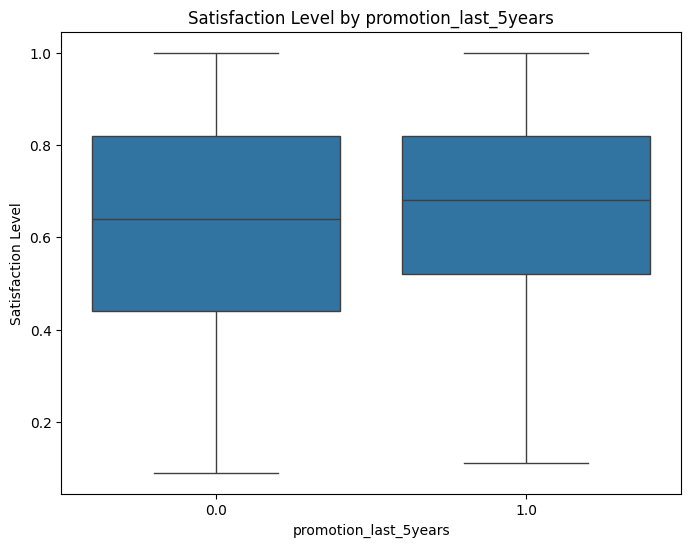

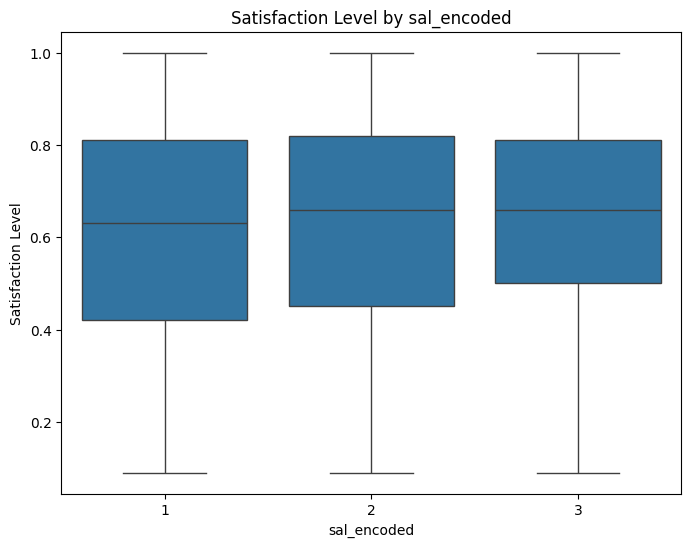

In [9]:
# Create a series of boxplots to visualize relationships between discrete features and satisfaction level

discrete_features = ['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sal_encoded']

figures = {}

# Create individual box plots and store them in the dictionary
for feature in discrete_features:
    if feature in data.columns:
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.boxplot(x=feature, y='satisfaction_level', data=data, ax=ax)
        ax.set_title(f'Satisfaction Level by {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Satisfaction Level')
        figures[feature] = fig
    else:
        print(f"Feature {feature} not found in the DataFrame")

# Display the figures individually
for feature, fig in figures.items():
    print(f"Displaying plot for {feature}")
    fig.show()

In [17]:
# Dig deeper into number of projects feature

# Show % of employees by number of projects
print('% Total EE by No. of Projects', data['number_project'].value_counts(normalize=True).sort_values() * 100)

# Show average satisfaction by number of projects
print('\nAvg Satisfaction by No. of Projects', data.groupby('number_project')['satisfaction_level'].mean())

# Show difference in average satisfaction with and without suboptimal projects
avg_all = data['satisfaction_level'].mean().round(2) * 100
print('\nAvg Satisfaction All Projects:', avg_all)

filt_data = data[(data['number_project'] >=3) & (data['number_project'] <= 5)]
avg_opt = filt_data['satisfaction_level'].mean().round(2) * 100
print('\nAvg Satisfaction 3-5 Projects:', avg_opt)

print('\nPercent Improvement:', ((avg_opt - avg_all) / avg_all * 100).round(2))

% Total EE by No. of Projects number_project
7.0     1.706780
6.0     7.827188
2.0    15.921061
5.0    18.407894
3.0    27.035136
4.0    29.101940
Name: proportion, dtype: float64

Avg Satisfaction by No. of Projects number_project
2.0    0.478769
3.0    0.687670
4.0    0.695132
5.0    0.678888
6.0    0.273458
7.0    0.118711
Name: satisfaction_level, dtype: float64

Avg Satisfaction All Projects: 61.0

Avg Satisfaction 3-5 Projects: 69.0

Percent Improvement: 13.11


### Checkpoint

During our Exploratory Data Analysis, we found an interesting connection between the Number of Projects employees are working on and their satisfaction level. Employees who have between 3 and 5 projects have the highest job satisfaction - around 68%. Employees with only 2 projects have an average of 48% job satisfaction, and Employees with 6 or 7 projects have 27% and 12%(!) satisfaction respectively, a huge decline! In fact, if we were to remove the employees with 2, 6, or 7 projects from the dataset, average satisfaction would increase by 13% from 61% to 69%. Let's keep looking at this variable to see if we can find any additional learnings

In [ ]:
# Check correlation between number of projects and other variables

# Top 3 Positive Correlations with 'number_project'
top_positive_correlations = correlation_matrix['number_project'].sort_values(ascending=False)[1:4]

# Top 3 Negative Correlations with 'number_project'
top_negative_correlations = correlation_matrix['number_project'].sort_values(ascending=True)[0:3]

# Print the results with improved formatting
print('Top 3 Positive Correlations with Number of Projects:')
for feature, correlation in top_positive_correlations.items():
    print(f'{feature}: {correlation:.4f}')

print('\nTop 3 Negative Correlations with Number of Projects:')
for feature, correlation in top_negative_correlations.items():
    print(f'{feature}: {correlation:.4f}')


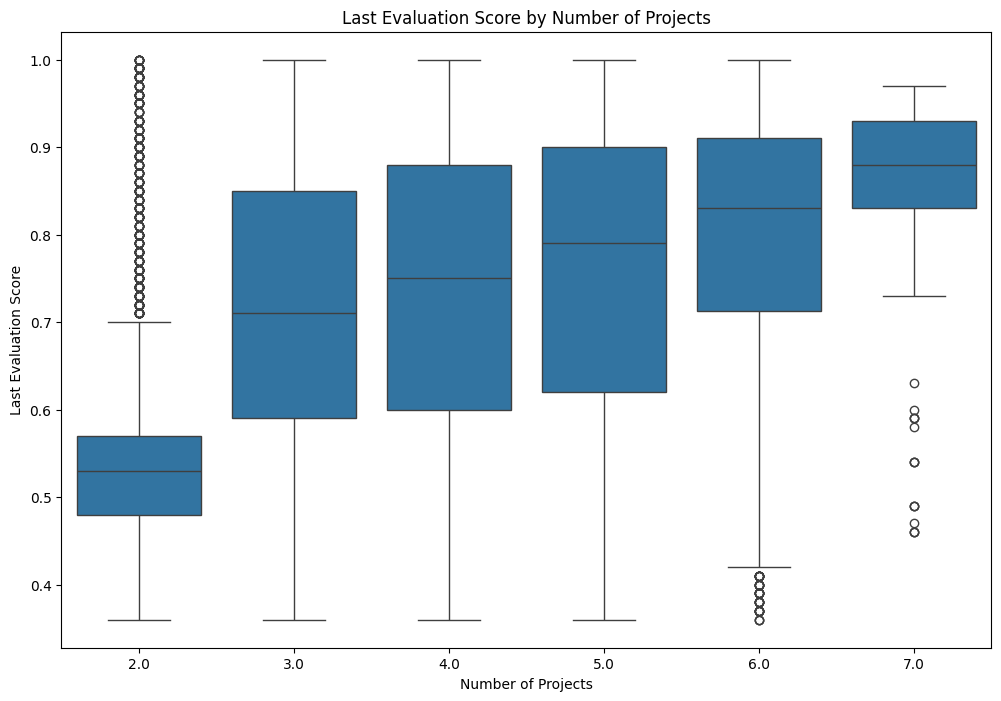

In [15]:
# We see a strong positive correlation between Employees' last evaluation score and their number of projects. Let's analyze this visually.

plt.figure(figsize=(12, 8))
sns.boxplot(x='number_project', y='last_evaluation', data=data)
plt.title('Last Evaluation Score by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Last Evaluation Score')
plt.show()

## Conclusions and Recommendations

### Key Findings
- Employees with 3-5 projects tend to have higher satisfaction levels.
- Higher average monthly hours are associated with lower satisfaction levels.
- Salary level impacts satisfaction, with higher salaries generally corresponding to higher satisfaction.

### Recommendations
- **Manage Workloads:** Ensure employees have 3-5 projects to optimize satisfaction.
- **Monitor Working Hours:** Regularly check and adjust working hours to prevent burnout.
- **Adjust Salaries:** Consider salary adjustments to improve overall satisfaction.